In [49]:
#importing relevant libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
pio.templates.default = "plotly_white"
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

In [50]:
# Loading dataset with ISO 8859-1 standard encoding
df = pd.read_csv("Instagram_data.csv", encoding = 'latin1')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [51]:
# Task 1
# printing columns 
print(df.columns)
# printing information about dataframe
df.info()

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), objec

In [52]:
# Task 2
# Displaying statistics about the data
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [53]:
# Task 3
print("Null values for each column are: ")
df.isnull().sum()

Null values for each column are: 


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [54]:
# Task 4
# Creating a histogram
fig = px.histogram(df, x='Impressions')

# Updating layout
fig.update_layout(title='Distribution of Impressions',
                  xaxis_title='Impressions',
                  yaxis_title='Count')

# Showing the figure
fig.show()

In [55]:
# Task 5 
fig = px.line(df, y='Impressions', title='Impressions Over Time')

fig.update_layout(
    xaxis_title='index',
    yaxis_title='Impressions',
    showlegend=False
)

fig.show()

In [56]:
# Task 6
# Creating traces for each metric
trace_likes = go.Scatter(y=df['Likes'], mode='lines', name='Likes')
trace_saves = go.Scatter(y=df['Saves'], mode='lines', name='Saves')
trace_follows = go.Scatter(y=df['Follows'], mode='lines', name='Follows')

# Creating the figure
fig = go.Figure()

# Adding traces to the figure
fig.add_trace(trace_likes)
fig.add_trace(trace_saves)
fig.add_trace(trace_follows)

# Updating layout
fig.update_layout(
    title='Metrics Over Time',
    xaxis_title='Date',
    yaxis_title='Count',
    legend_title='Metric'
)

# Show the figure
fig.show()

In [57]:
# Task 7
# Summing up the values for reach from different sources to create total values for each category in a new dataframe
source_totals = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum().reset_index()
# Renaming columns of new dataframe to 'Source' and 'Reach'
source_totals.columns = ['Source', 'Reach']

# Creating a pie chart
fig = px.pie(source_totals, values='Reach', names='Source', title='Reach from Different Sources')

# Displaying the percentage values on the pie chart
fig.update_traces(textinfo='percent')

# Showing the figure
fig.show()

In [58]:
# Task 8
# Summing up the values for engagement sources to create total values for each category into a new dataframe
engagement_totals = df[['Likes', 'Saves', 'Shares', 'Comments']].sum().reset_index()
engagement_totals.columns = ['Engagement', 'Total']

# Creating a pie chart
fig = px.pie(engagement_totals, values='Total', names='Engagement', title='Engagement Sources')

# Displaying the percentage values on the pie chart
fig.update_traces(textinfo='percent')

# Show the figure
fig.show()

In [59]:
# Task 9
# Create a scatter plot
fig = px.scatter(df, x='Profile Visits', y='Follows', trendline='ols',
                 title='Profile Visits vs. Follows')

# Show the plot
fig.show()


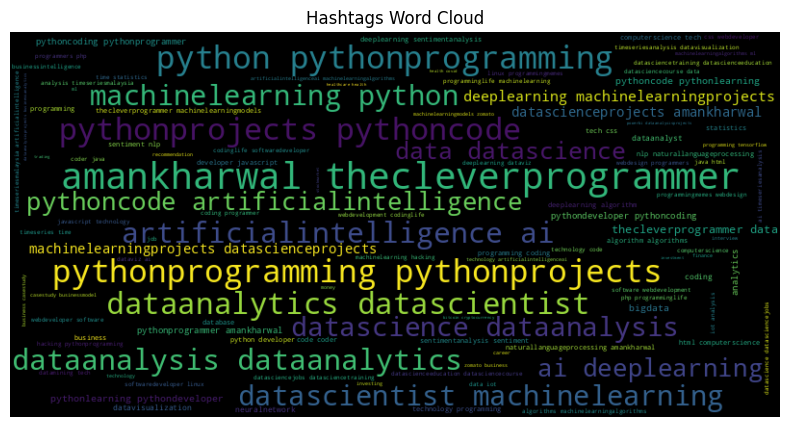

In [60]:
# Task 10
# Combining all hashtags into a single string
all_hashtags = ' '.join(df['Hashtags'].dropna())

# Creating the word cloud object
wordcloud = WordCloud(width = 800, height = 400, background_color ='black').generate(all_hashtags)

# Displaying the word cloud using matplotlib
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

# Turning off axis
plt.axis('off')
plt.title('Hashtags Word Cloud')

# Showing figure
plt.show()


/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_15771/3876073022.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



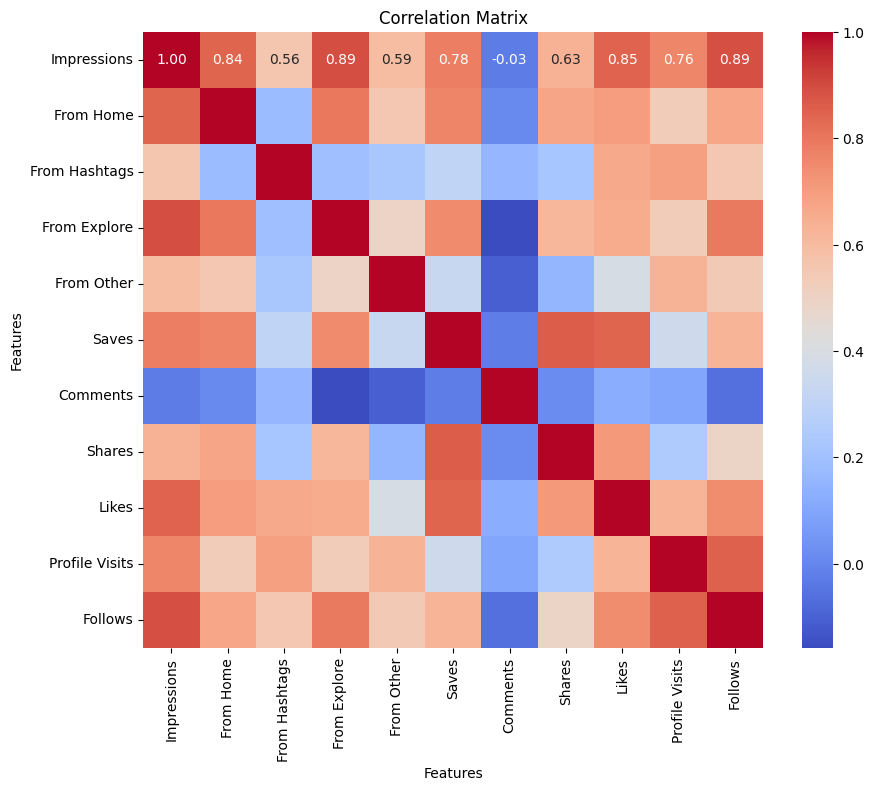

In [61]:
# Task 11
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

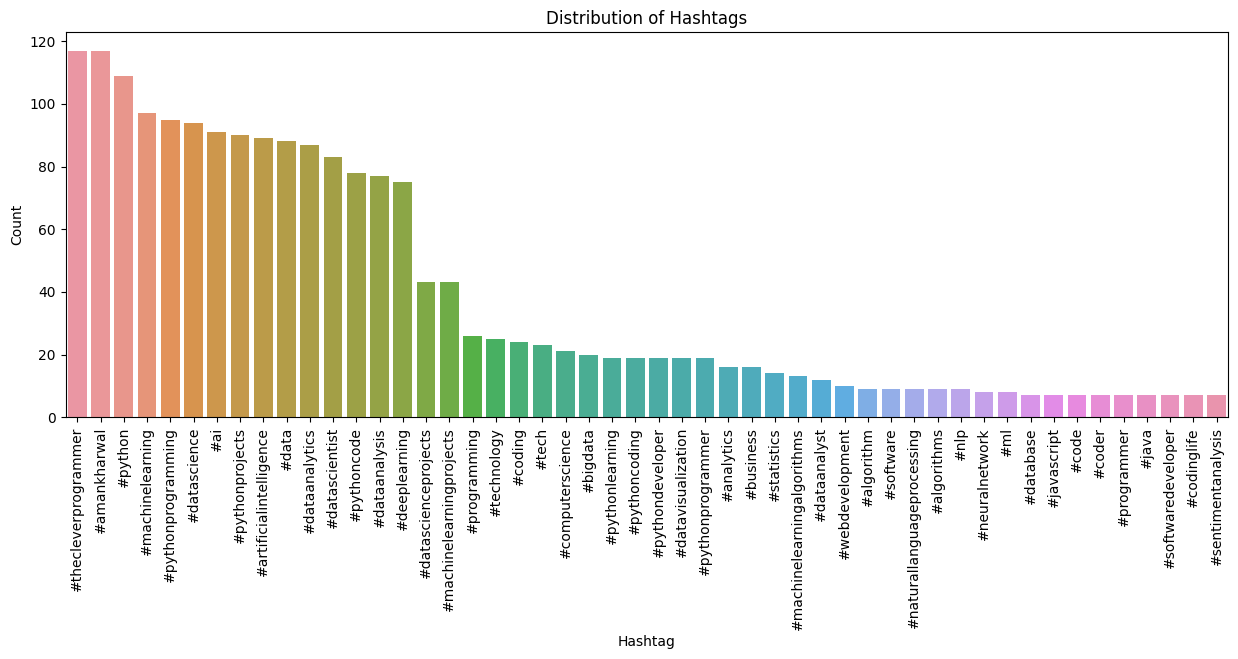

In [62]:
# Task 12
# Spliting the hashtags in the 'Hashtags' column and flatten the list of lists
hashtags_list = [hashtag for sublist in df['Hashtags'].dropna().str.split() for hashtag in sublist]

# Count the occurrences of each hashtag
hashtag_counts = Counter(hashtags_list)

# Convert to DataFrame for easy plotting
hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count']).sort_values(by='Count', ascending=False)

# Plot the distribution of the top N hashtags
plt.figure(figsize=(15, 5))
sns.barplot(x='Hashtag', y='Count', data=hashtag_df.head(50))
plt.xticks(rotation=90)
plt.title('Distribution of Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.show()


In [63]:
#Task 13
# Converting 'Hashtags' to string type and then split
df['Hashtags'] = df['Hashtags'].astype(str).str.split().dropna()

# Exploding 'Hashtags' into separate rows
exploded_df = df.explode('Hashtags')

# Grouping by 'Hashtags' and sum 'Likes' and 'Impressions'
grouped_df = exploded_df.groupby('Hashtags').agg({'Likes': 'sum', 'Impressions': 'sum'}).reset_index()

# Sorting the hashtags by 'Likes' and 'Impressions'
sorted_likes = grouped_df.sort_values(by='Likes', ascending=False).head(50)
sorted_impressions = grouped_df.sort_values(by='Impressions', ascending=False).head(50)




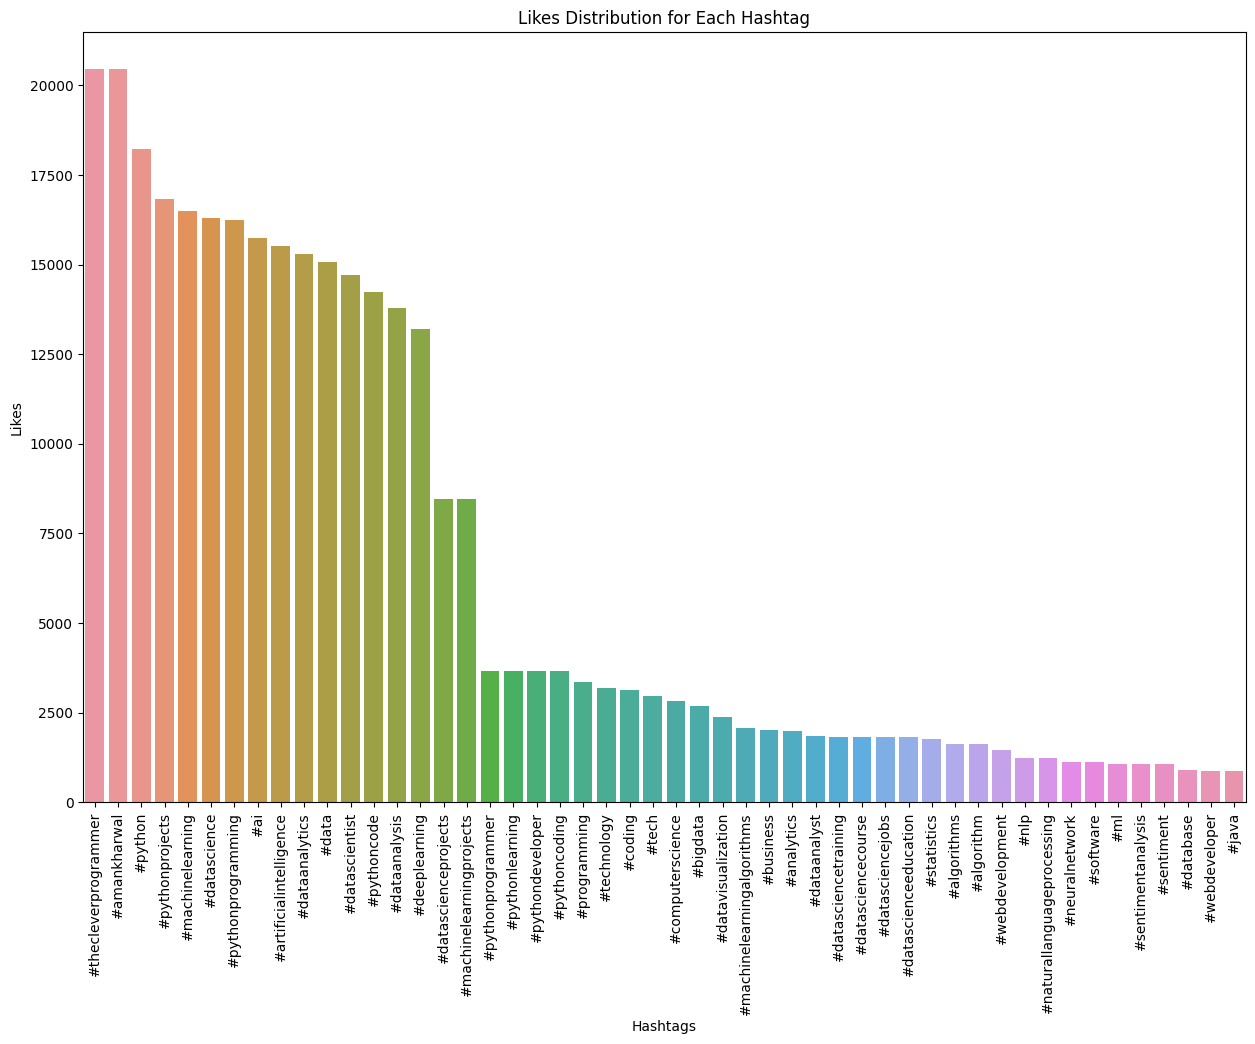

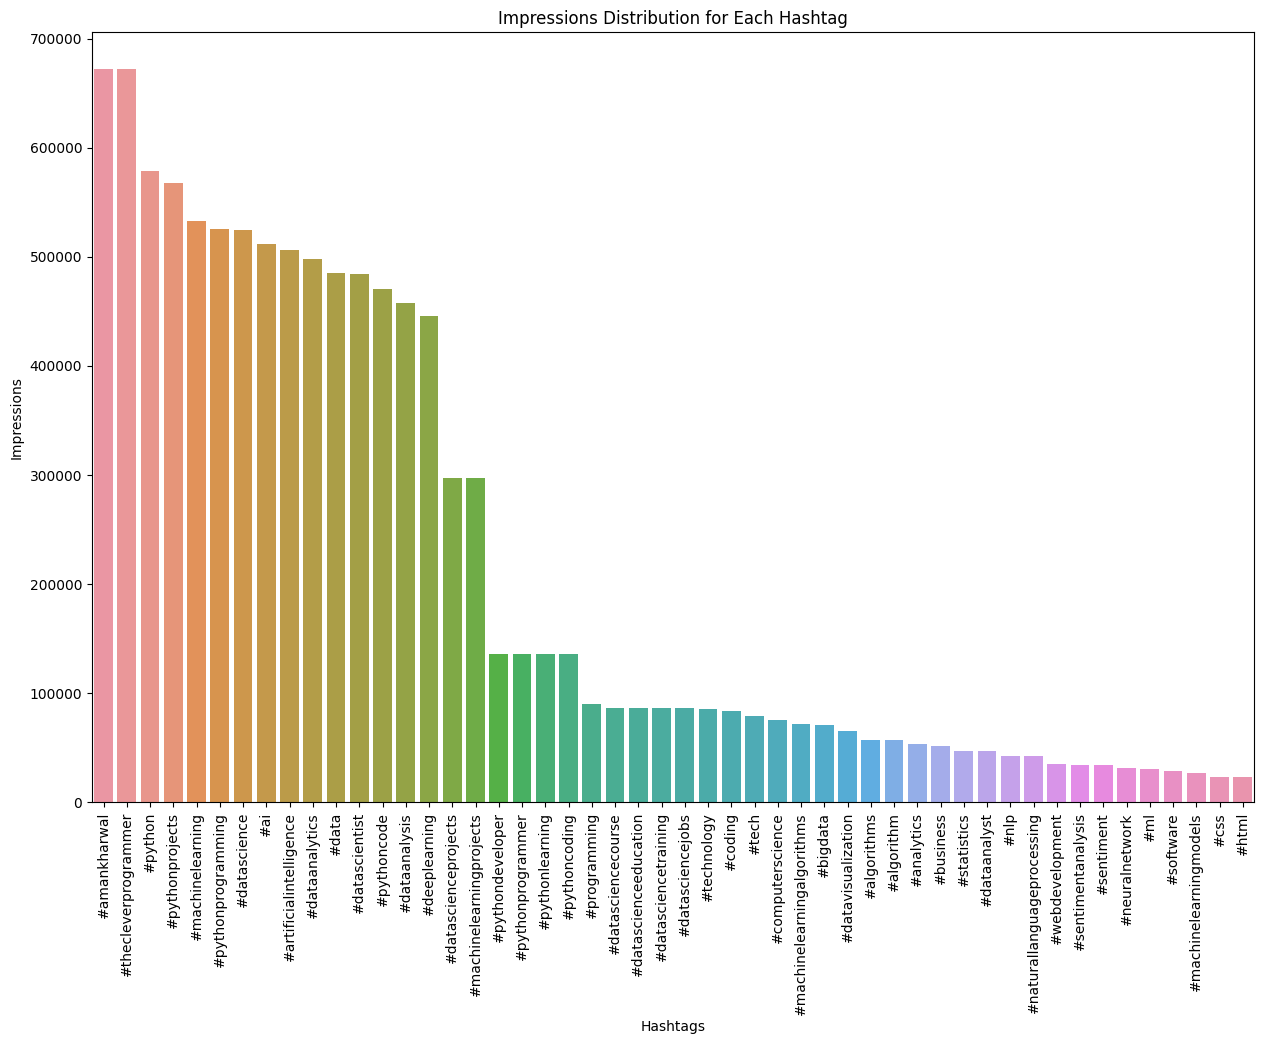

In [64]:
# Plotting the Likes distribution
plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_likes, x='Hashtags', y='Likes')
plt.xticks(rotation=90)
plt.title('Likes Distribution for Each Hashtag')
plt.show()

# Plotting the Impressions distribution
plt.figure(figsize=(15, 10))
sns.barplot(data=sorted_impressions, x='Hashtags', y='Impressions')
plt.xticks(rotation=90)
plt.title('Impressions Distribution for Each Hashtag')
plt.show()

In [65]:
# Task 14
'''
    This dataset contains valuable information regarding how Instagram posts receive impressions.
    It contains the types of impressions received over time and the sources that contribute to the impressions.
    There are 13 columns and 119 entries in this particular dataset. There are no NULL values.
    From the Impressions histogram, it is observed that most posts get around 0-5k impressions.
    The Impressions over time remain relatively stable with periodic spikes and a slightly upwards general trend.
    The metrics graph shows that Likes and Saves follow each other with consistent spikes together whereas, follows do not follow the same trend.
    The pie chart for reach shows that the Home page is a major contributor to the Impressions received.
    Meanwhile, the pie chart for engagement sources clearly indicates that likes are the most common type of engagement, followed closely by saves.
    It can also be seen that Profile visits vs Follows has a positive linear correlation between them, indicating follows increase with profile visits.
    The word cloud suggests hashtags like 'pythonprojects, 'dataanalytics', 'thecleverprogrammer' are the most popular hastags.
    The correlation matrix provides another visualization for correlations between different features of the dataset.
    The distribution matrix for hashtags confirms the observations in the word cloud.
    The hashtags vs likes distribution indicates that the most commonly used hashtags also garner the most likes, hence why they are so popular.
    Similarly, these hashtags also get the most impressions. So a post may use these to get the most engagemenet.
'''

"\n    This dataset contains valuable information regarding how Instagram posts receive impressions.\n    It contains the types of impressions received over time and the sources that contribute to the impressions.\n    There are 13 columns and 119 entries in this particular dataset. There are no NULL values.\n    From the Impressions histogram, it is observed that most posts get around 0-5k impressions.\n    The Impressions over time remain relatively stable with periodic spikes and a slightly upwards general trend.\n    The metrics graph shows that Likes and Saves follow each other with consistent spikes together whereas, follows do not follow the same trend.\n    The pie chart for reach shows that the Home page is a major contributor to the Impressions received.\n    Meanwhile, the pie chart for engagement sources clearly indicates that likes are the most common type of engagement, followed closely by saves.\n    It can also be seen that Profile visits vs Follows has a positive linea